# Data Visualization in audio files 

In [133]:
import pandas as pd
import numpy as np

from glob import glob

In [134]:
audio_files = glob('./recordings/*.wav')

In [135]:
empty_dataframe = pd.DataFrame(columns=['file_name', 'digit', 'index', 'speaker', 'duration'])

In [136]:
i = 5
j = 0

mat = [[0 for _ in range(5)] for _ in range(1656)]

In [138]:
for name in audio_files:
    sh_name = name[13:-3]
    sh_names = sh_name.replace('.', '')
    mat[j][0] = sh_name
    mat[j][1] = name[15]
    j += 1

In [ ]:
mat

[['0_george_1.', 'g', 0, 0, 0],
 ['0_george_10.', 'g', 0, 0, 0],
 ['0_george_12.', 'g', 0, 0, 0],
 ['0_george_13.', 'g', 0, 0, 0],
 ['0_george_16.', 'g', 0, 0, 0],
 ['0_george_18.', 'g', 0, 0, 0],
 ['0_george_19.', 'g', 0, 0, 0],
 ['0_george_2.', 'g', 0, 0, 0],
 ['0_george_20.', 'g', 0, 0, 0],
 ['0_george_22.', 'g', 0, 0, 0],
 ['0_george_24.', 'g', 0, 0, 0],
 ['0_george_25.', 'g', 0, 0, 0],
 ['0_george_27.', 'g', 0, 0, 0],
 ['0_george_28.', 'g', 0, 0, 0],
 ['0_george_29.', 'g', 0, 0, 0],
 ['0_george_3.', 'g', 0, 0, 0],
 ['0_george_30.', 'g', 0, 0, 0],
 ['0_george_31.', 'g', 0, 0, 0],
 ['0_george_32.', 'g', 0, 0, 0],
 ['0_george_33.', 'g', 0, 0, 0],
 ['0_george_34.', 'g', 0, 0, 0],
 ['0_george_36.', 'g', 0, 0, 0],
 ['0_george_37.', 'g', 0, 0, 0],
 ['0_george_4.', 'g', 0, 0, 0],
 ['0_george_40.', 'g', 0, 0, 0],
 ['0_george_42.', 'g', 0, 0, 0],
 ['0_george_43.', 'g', 0, 0, 0],
 ['0_george_44.', 'g', 0, 0, 0],
 ['0_george_45.', 'g', 0, 0, 0],
 ['0_george_47.', 'g', 0, 0, 0],
 ['0_george_48

In [ ]:
ipd.Audio(audio_files[audio_index])

NameError: name 'ipd' is not defined

In [ ]:
y, sr = librosa.load(audio_files[audio_index])

In [ ]:
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0.00100198 0.00088148 0.00067815 0.00066853 0.00099314 0.001548
 0.00207171 0.00235225 0.00238055 0.00233051]
shape y: (13029,)
sr: 22050


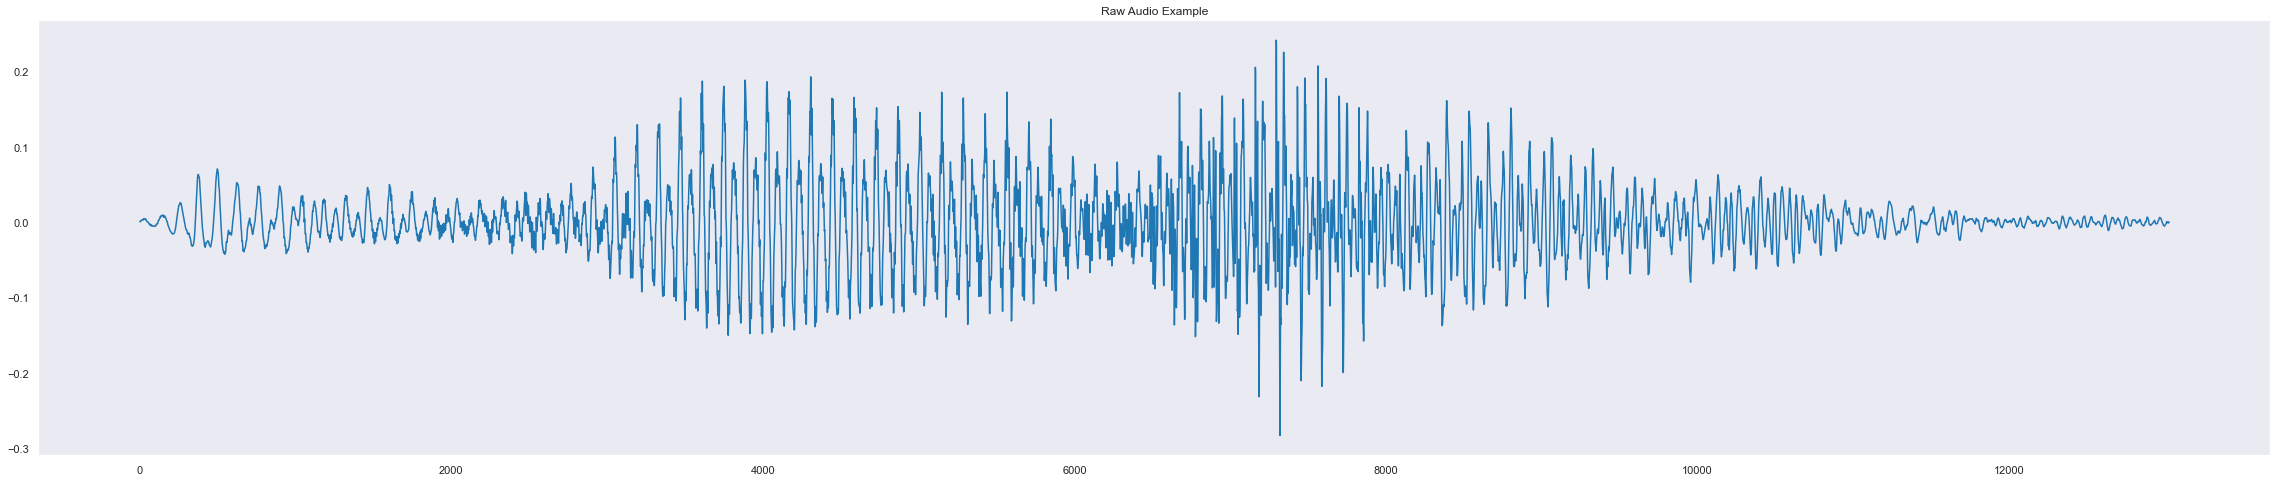

In [ ]:
pd.Series(y).plot(figsize=(40, 8),
                  lw=1.5,
                  title='Raw Audio Example',
                  color = color_pal[0])
plt.show()

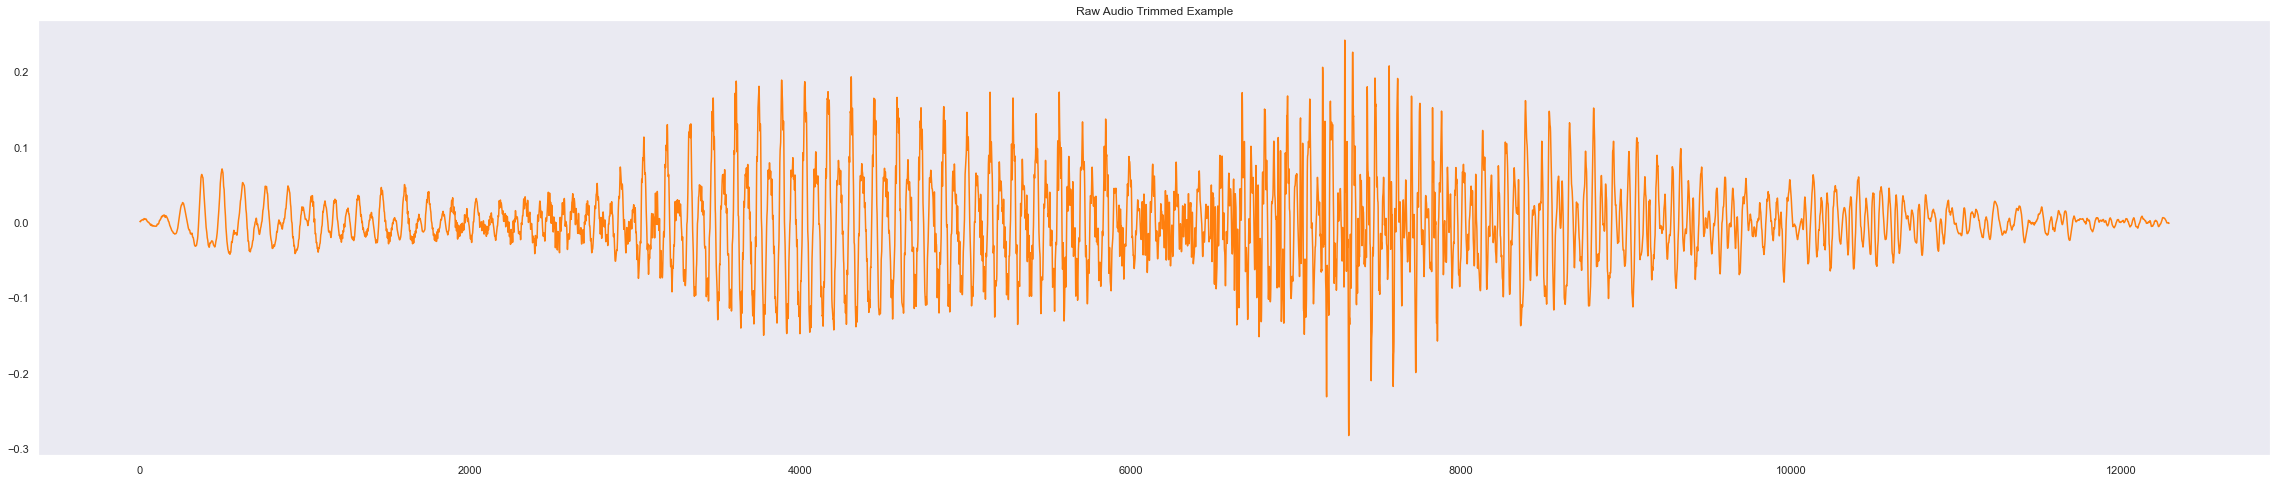

In [ ]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

pd.Series(y_trimmed).plot(figsize=(40, 8),
                  lw=1.5,
                  title='Raw Audio Trimmed Example',
                  color = color_pal[1])
plt.show()

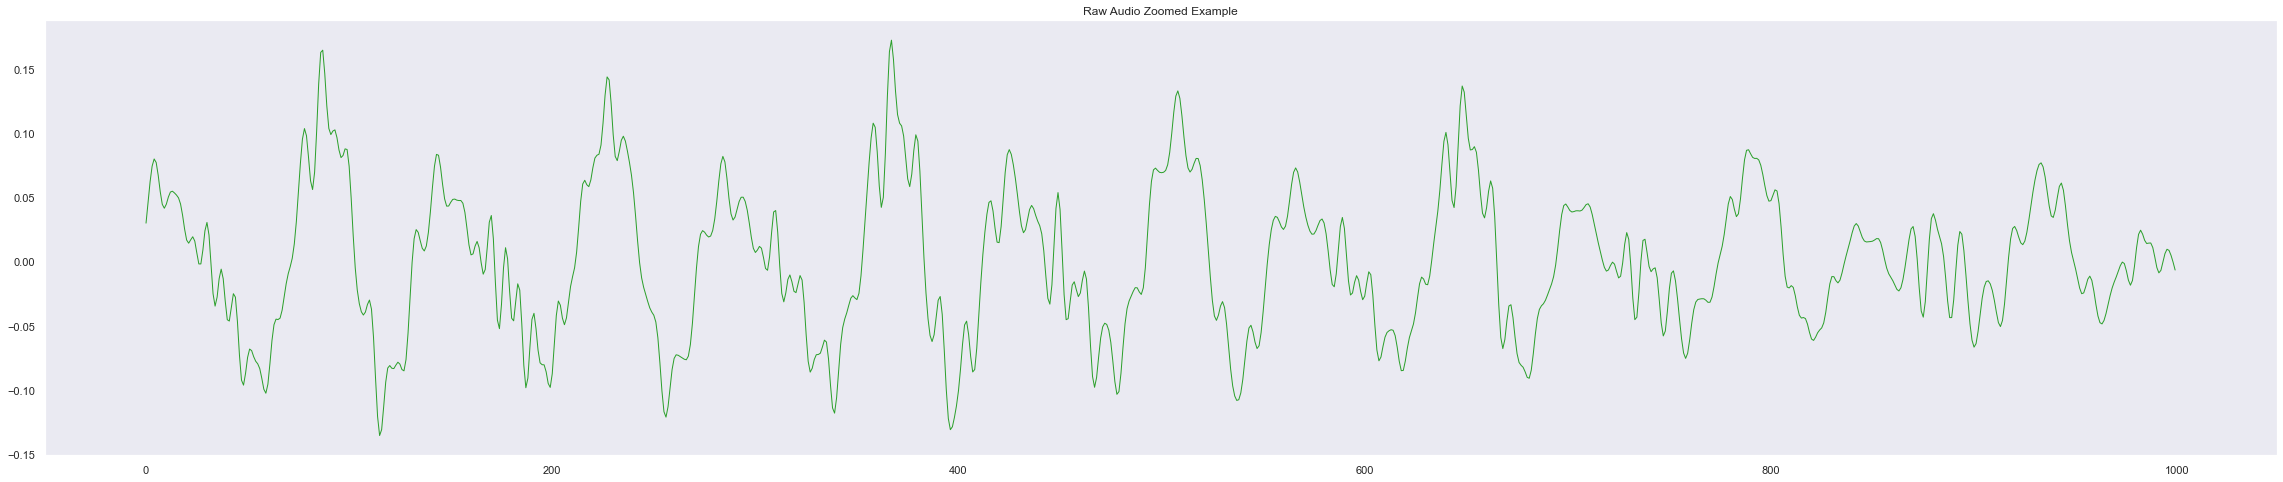

In [ ]:
pd.Series(y_trimmed[5200:6200]).plot(figsize=(40, 8),
                  lw=1,
                  title='Raw Audio Zoomed Example',
                  color = color_pal[2])
plt.show()

# STFT

In [ ]:
D = librosa.stft(y_trimmed)
S_db_power = librosa.power_to_db(np.abs(D), ref=np.max)
S_db_power.shape

(1025, 25)

In [ ]:
D = librosa.stft(y_trimmed)
S_db_amplitude = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db_amplitude.shape

(1025, 25)

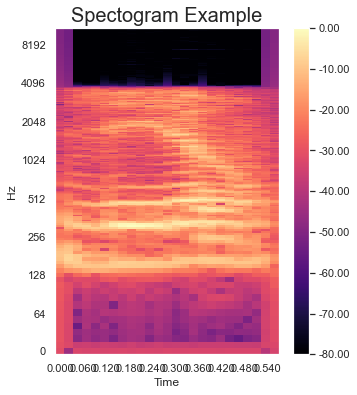

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))
img = lrd.specshow(S_db_power,
                   x_axis='time',
                   y_axis='log',
                   ax=ax)
ax.set_title('Spectogram Example', fontsize = 20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

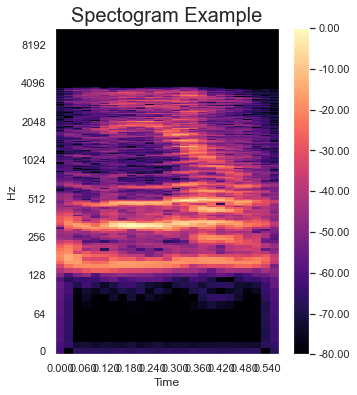

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))
img = lrd.specshow(S_db_amplitude,
                   x_axis='time',
                   y_axis='log',
                   ax=ax)
ax.set_title('Spectogram Example', fontsize = 20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

C:\Users\Elara\AppData\Local\Temp\ipykernel_14228\635383153.py:1: FutureWarning: Pass y=[0.00100198 0.00088148 0.00067815 ... 0.0003705  0.00049394 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128,)


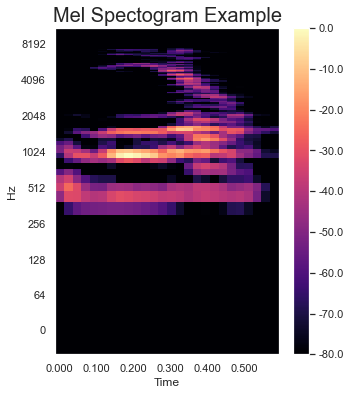

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))
img = lrd.specshow(S_db_mel,
                   x_axis='time',
                   y_axis='log',
                   ax=ax)
ax.set_title('Mel Spectogram Example', fontsize = 20)
fig.colorbar(img, ax=ax, format=f'%0.1f')
plt.show()